In [ ]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#import packages
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from statistics import mean

In [ ]:
#Dataframe
df = pd.read_csv('/content/Table1.csv')
df.head()

,username,num_of_questions_answered,num_of_correct_answers,num_of_explanations,num_of_lectures,devicesUsed,confidence_level,payments,duration
0,u100043,605,264,412,22,web,24,1,8640000000
1,u10019,1761,1412,1766,3,web,105,0,0
2,u10020,169,115,119,2,Unknown,19,1,15552000000
3,u10021,136,96,114,1,Unknown,3,2,28080000000
4,u10026,60,42,65,3,mobile,48,1,2592000000


In [ ]:
#Payments count
df['payments'].value_counts()

0    11648
1     2304
2      366
3       39
4        6
6        1
5        1
Name: payments, dtype: int64

In [ ]:
#Describe Data
df.describe()

,num_of_questions_answered,num_of_correct_answers,num_of_explanations,num_of_lectures,confidence_level,payments,duration
count,14365.000000,14365.000000,14365.000000,14365.000000,14365.000000,14365.000000,1.436500e+04
mean,137.800278,89.614062,112.498016,4.475740,44.752872,0.221928,1.871419e+09
std,444.964031,302.548675,365.400012,17.875819,248.400894,0.498431,4.859313e+09
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,10.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,56.000000,33.000000,49.000000,1.000000,4.000000,0.000000,0.000000e+00
max,8315.000000,5771.000000,7772.000000,484.000000,7395.000000,6.000000,4.665600e+10


In [ ]:
#Correlation
df.corr()

<ipython-input-6-7e6697e05da5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,num_of_questions_answered,num_of_correct_answers,num_of_explanations,num_of_lectures,confidence_level,payments,duration
num_of_questions_answered,1.000000,0.985589,0.968221,0.662739,0.635125,0.422844,0.397360
num_of_correct_answers,0.985589,1.000000,0.948610,0.654588,0.636431,0.415730,0.391065
num_of_explanations,0.968221,0.948610,1.000000,0.676889,0.644347,0.408565,0.395483
num_of_lectures,0.662739,0.654588,0.676889,1.000000,0.513942,0.416869,0.408214
confidence_level,0.635125,0.636431,0.644347,0.513942,1.000000,0.296600,0.283360
payments,0.422844,0.415730,0.408565,0.416869,0.296600,1.000000,0.853899
duration,0.397360,0.391065,0.395483,0.408214,0.283360,0.853899,1.000000


<ipython-input-7-b1c39158000e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


<Axes: >

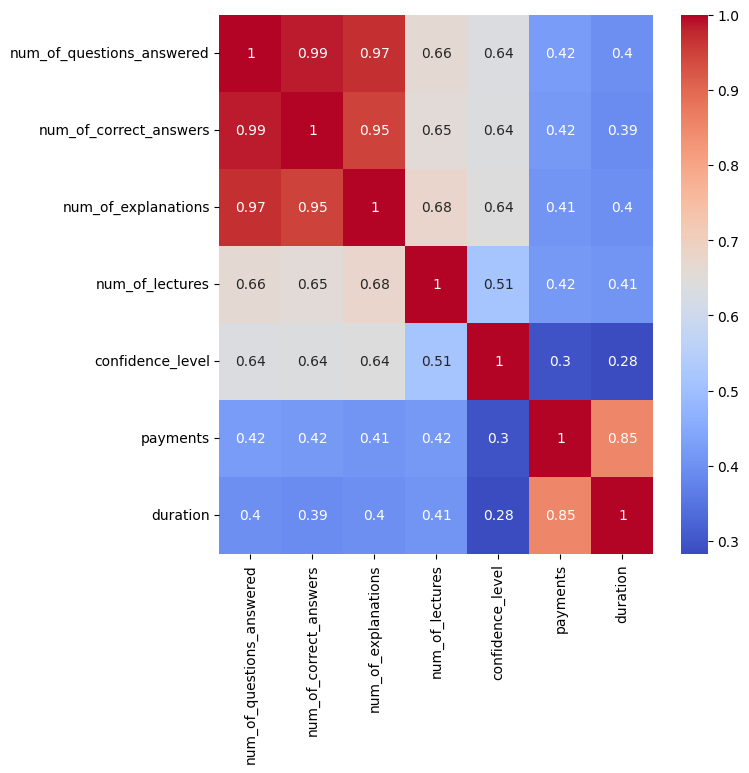

In [ ]:
#Correlation Heat Map
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [ ]:
#Accuracy column
df['accuracy'] = df['num_of_correct_answers']/df['num_of_questions_answered']
df.head()

,username,num_of_questions_answered,num_of_correct_answers,num_of_explanations,num_of_lectures,devicesUsed,confidence_level,payments,duration,accuracy
0,u100043,605,264,412,22,web,24,1,8640000000,0.436364
1,u10019,1761,1412,1766,3,web,105,0,0,0.801817
2,u10020,169,115,119,2,Unknown,19,1,15552000000,0.680473
3,u10021,136,96,114,1,Unknown,3,2,28080000000,0.705882
4,u10026,60,42,65,3,mobile,48,1,2592000000,0.700000


In [ ]:
#Correlation
df.corr()

<ipython-input-9-7e6697e05da5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,num_of_questions_answered,num_of_correct_answers,num_of_explanations,num_of_lectures,confidence_level,payments,duration,accuracy
num_of_questions_answered,1.000000,0.985589,0.968221,0.662739,0.635125,0.422844,0.397360,0.192296
num_of_correct_answers,0.985589,1.000000,0.948610,0.654588,0.636431,0.415730,0.391065,0.208398
num_of_explanations,0.968221,0.948610,1.000000,0.676889,0.644347,0.408565,0.395483,0.195877
num_of_lectures,0.662739,0.654588,0.676889,1.000000,0.513942,0.416869,0.408214,0.148438
confidence_level,0.635125,0.636431,0.644347,0.513942,1.000000,0.296600,0.283360,0.110947
payments,0.422844,0.415730,0.408565,0.416869,0.296600,1.000000,0.853899,0.213147
duration,0.397360,0.391065,0.395483,0.408214,0.283360,0.853899,1.000000,0.183982
accuracy,0.192296,0.208398,0.195877,0.148438,0.110947,0.213147,0.183982,1.000000


In [ ]:
#New Dataframe
df12 = df[['num_of_lectures','devicesUsed', 'payments', 'accuracy']]
df12

,num_of_lectures,devicesUsed,payments,accuracy
0,22,web,1,0.436364
1,3,web,0,0.801817
2,2,Unknown,1,0.680473
3,1,Unknown,2,0.705882
4,3,mobile,1,0.700000
...,...,...,...,...
14360,5,mobile,0,0.571429
14361,4,web,1,0.555556
14362,3,web,1,0.824176
14363,1,mobile,0,0.692913


In [ ]:
#Split Dataframe into web, mobile, unknown
df_web = df12.loc[df12['devicesUsed'] == 'web']
df_Unknown = df12.loc[df12['devicesUsed'] == 'Unknown']
df_mobile = df12.loc[df12['devicesUsed'] == 'mobile']

In [ ]:
#Accuracy of Certain Devices
print(df_web['accuracy'].mean())
print(df_Unknown['accuracy'].mean())
print(df_mobile['accuracy'].mean())

0.4782323505082695
0.617704862962682
0.5226105373108346


In [ ]:
#Correlation of Selected Features
df_web.corr()

<ipython-input-13-39711dcf641c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_web.corr()


,num_of_lectures,payments,accuracy
num_of_lectures,1.000000,0.457587,0.090281
payments,0.457587,1.000000,0.105723
accuracy,0.090281,0.105723,1.000000


In [ ]:
#dropping string features and using accuracy as target
y = df['accuracy']
df.fillna(df.mean(), inplace=True)
df.head()
newdf=df.drop(['username','devicesUsed','accuracy'],axis=1)
newdf

<ipython-input-14-8e19a878317d>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


,num_of_questions_answered,num_of_correct_answers,num_of_explanations,num_of_lectures,confidence_level,payments,duration
0,605,264,412,22,24,1,8640000000
1,1761,1412,1766,3,105,0,0
2,169,115,119,2,19,1,15552000000
3,136,96,114,1,3,2,28080000000
4,60,42,65,3,48,1,2592000000
...,...,...,...,...,...,...,...
14360,14,8,4,5,0,0,0
14361,9,5,10,4,0,1,8640000000
14362,91,75,82,3,6,1,15552000000
14363,127,88,133,1,4,0,0


In [ ]:
#test, train, split
x_train, x_test, y_train, y_test = train_test_split(newdf, y, test_size = 0.25, random_state=42)

In [ ]:
#install lazypredict
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import Classifiers
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import BayesianRidge, ElasticNet, ElasticNetCV, HuberRegressor, LinearRegression, Lars, LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV, LassoLarsIC, OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV
from sklearn.linear_model import PassiveAggressiveRegressor, RANSACRegressor, Ridge, RidgeCV, SGDRegressor, TweedieRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.compose import TransformedTargetRegressor

In [ ]:
#Lazypredict
#source: https://lazypredict.readthedocs.io/en/latest/
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, regressors=[AdaBoostRegressor, BaggingRegressor, BayesianRidge, DecisionTreeRegressor, DummyRegressor, ElasticNet,
                                                                                      ElasticNetCV, ExtraTreeRegressor, ExtraTreesRegressor, GradientBoostingRegressor,
                                                                                      HuberRegressor, KNeighborsRegressor, KernelRidge, Lars, LarsCV, Lasso, LassoCV, LassoLars, LassoLarsCV, 
                                                                                      LassoLarsIC, LinearRegression, LinearSVR, MLPRegressor, NuSVR, OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV,
                                                                                      PassiveAggressiveRegressor, RANSACRegressor, RandomForestRegressor, Ridge, RidgeCV, SGDRegressor, SVR,
                                                                                      TransformedTargetRegressor, TweedieRegressor])
models,pred = reg.fit(x_train, x_test, y_train, y_test)
models.head(8)

100%|██████████| 35/35 [00:54<00:00,  1.57s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,1.00,1.00,0.01,3.13
BaggingRegressor,1.00,1.00,0.01,0.46
DecisionTreeRegressor,0.99,0.99,0.02,0.16
ExtraTreesRegressor,0.99,0.99,0.02,2.33
ExtraTreeRegressor,0.98,0.98,0.03,0.09
GradientBoostingRegressor,0.95,0.95,0.05,1.93
KNeighborsRegressor,0.89,0.89,0.07,0.30
AdaBoostRegressor,0.72,0.72,0.12,0.50


In [ ]:
#Linear and Ridge Regressions
lr = LinearRegression()
rr = Ridge(alpha=.01)
rr100 = Ridge(alpha=100)

In [ ]:
#Fit the train model for 'lr' and 'rr'
lr.fit(x_train, y_train)
rr.fit(x_train, y_train)
rr100.fit(x_train, y_train)

Ridge(alpha=100)

In [ ]:
#Print scores for 3 models
train_score=lr.score(x_train, y_train)
test_score=lr.score(x_test, y_test)
Ridge_train_score = rr.score(x_train,y_train)
Ridge_test_score = rr.score(x_test, y_test)
Ridge_train_score100 = rr100.score(x_train,y_train)
Ridge_test_score100 = rr100.score(x_test, y_test)
print("LR train score:", train_score)
print("LR test score:", test_score)
print("RR train score:", Ridge_train_score) 
print("RR test score:", Ridge_test_score) 
print("RR100 train score:", Ridge_train_score100) 
print("RR100 test score:", Ridge_test_score100) 

LR train score: 0.07760828778101392
LR test score: 0.0676036885336988
RR train score: 0.07760828777913809
RR test score: 0.06760372145174176
RR100 train score: 0.07746524116341658
RR100 test score: 0.06774478839402376


In [ ]:
#Modified Database
df13 = df[['num_of_lectures', 'payments', 'duration']]
df13

,num_of_lectures,payments,duration
0,22,1,8640000000
1,3,0,0
2,2,1,15552000000
3,1,2,28080000000
4,3,1,2592000000
...,...,...,...
14360,5,0,0
14361,4,1,8640000000
14362,3,1,15552000000
14363,1,0,0


In [ ]:
#test, train, split
X_train, X_test, Y_train, Y_test = train_test_split(df13, y, test_size = 0.25)
lr = LinearRegression()
rr = Ridge(alpha=.01)
rr100 = Ridge(alpha=100)
lr.fit(X_train, Y_train)
rr.fit(X_train, Y_train)
rr100.fit(X_train, Y_train)
train_score=lr.score(X_train, Y_train)
test_score=lr.score(X_train, Y_train)
Ridge_train_score = rr.score(X_train, Y_train)
Ridge_test_score = rr.score(X_train, Y_train)
Ridge_train_score100 = rr100.score(X_train, Y_train)
Ridge_test_score100 = rr100.score(X_train, Y_train)
print("LR train score:", train_score)
print("LR test score:", test_score)
print("RR train score:", Ridge_train_score) 
print("RR test score:", Ridge_test_score) 
print("RR100 train score:", Ridge_train_score100) 
print("RR100 test score:", Ridge_test_score100)

LR train score: 0.04854372161028109
LR test score: 0.04854372161028109
RR train score: 0.04854372160846865
RR test score: 0.04854372160846865
RR100 train score: 0.04840380431732183
RR100 test score: 0.04840380431732183


In [ ]:
#use LassoCV to find optimal alpha value
lassocv = LassoCV(cv=10, max_iter=100000).fit(X_train,Y_train)
lassocv.coef_

array([0.00000000e+00, 0.00000000e+00, 8.18132532e-12])